In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms
from helper_functions import set_seeds

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

for parameter in pretrained_vit.parameters():
    parameter.requires_grad = False

class_names = ['cats','dogs', 'horses', 'humans']

set_seeds()
pretrained_vit.heads = nn.Linear(in_features=768, out_features=len(class_names)).to(device)

In [ ]:
train_dir = '/content/drive/MyDrive/CNN' # Train dataset images
test_dir = '/content/drive/MyDrive/Val_Dataset' # Test dataset images

In [ ]:
pretrained_vit_transforms = pretrained_vit_weights.transforms()
print(pretrained_vit_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [ ]:
import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str,
    test_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int=NUM_WORKERS
):

  # Use ImageFolder to create dataset(s)
  train_data = datasets.ImageFolder(train_dir, transform=transform)
  test_data = datasets.ImageFolder(test_dir, transform=transform)

  # Get class names
  class_names = train_data.classes

  # Turn images into data loaders
  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )
  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      pin_memory=True,
  )

  return train_dataloader, test_dataloader, class_names

In [ ]:
# Setup dataloaders
train_dataloader_pretrained, test_dataloader_pretrained, class_names = create_dataloaders(train_dir=train_dir,
                                                                                                     test_dir=test_dir,
                                                                                                     transform=pretrained_vit_transforms,
                                                                                                     batch_size=32)

In [ ]:
from going_modular.going_modular import engine

# Create optimizer and loss function
optimizer = torch.optim.Adam(params=pretrained_vit.parameters(),
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

# Train the classifier head of the pretrained ViT feature extractor model
set_seeds()
pretrained_vit_results = engine.train(model=pretrained_vit,
                                      train_dataloader=train_dataloader_pretrained,
                                      test_dataloader=test_dataloader_pretrained,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6322 | train_acc: 0.8212 | test_loss: 0.2635 | test_acc: 0.9458
Epoch: 2 | train_loss: 0.1671 | train_acc: 0.9774 | test_loss: 0.1507 | test_acc: 0.9562
Epoch: 3 | train_loss: 0.0974 | train_acc: 0.9883 | test_loss: 0.1207 | test_acc: 0.9562
Epoch: 4 | train_loss: 0.0693 | train_acc: 0.9932 | test_loss: 0.0994 | test_acc: 0.9562
Epoch: 5 | train_loss: 0.0537 | train_acc: 0.9959 | test_loss: 0.0853 | test_acc: 0.9562
Epoch: 6 | train_loss: 0.0430 | train_acc: 0.9959 | test_loss: 0.0782 | test_acc: 0.9562
Epoch: 7 | train_loss: 0.0360 | train_acc: 0.9959 | test_loss: 0.0742 | test_acc: 0.9562
Epoch: 8 | train_loss: 0.0301 | train_acc: 0.9959 | test_loss: 0.0659 | test_acc: 0.9729
Epoch: 9 | train_loss: 0.0259 | train_acc: 0.9986 | test_loss: 0.0617 | test_acc: 0.9729
Epoch: 10 | train_loss: 0.0227 | train_acc: 0.9973 | test_loss: 0.0624 | test_acc: 0.9729


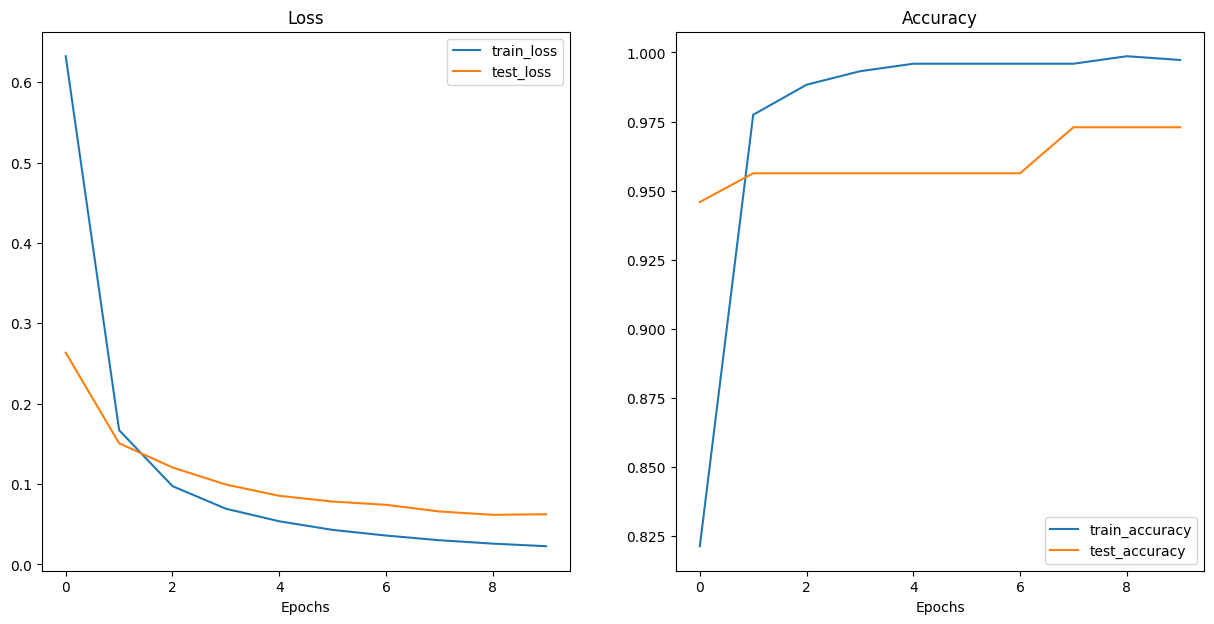

In [ ]:
plot_loss_curves(pretrained_vit_results)

In [ ]:
 # MAKING PREDICTIONS

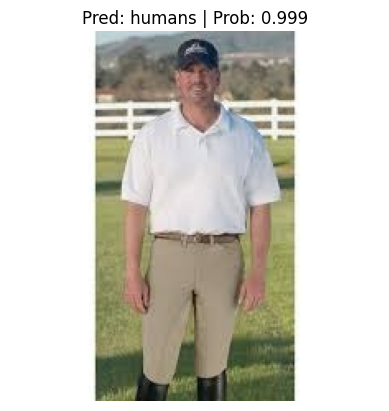

In [ ]:
import requests

from going_modular.going_modular.predictions import pred_and_plot_image

custom_image_path = '/content/drive/MyDrive/Val_Dataset/humans/rider-104.jpg'

pred_and_plot_image(model=pretrained_vit,
                    image_path=custom_image_path,
                    class_names=class_names)

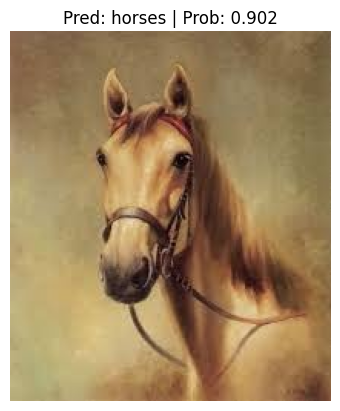

In [ ]:
custom_image_path = '/content/drive/MyDrive/Val_Dataset/horses/horse-155.jpg'

pred_and_plot_image(model=pretrained_vit,
                    image_path=custom_image_path,
                    class_names=class_names)

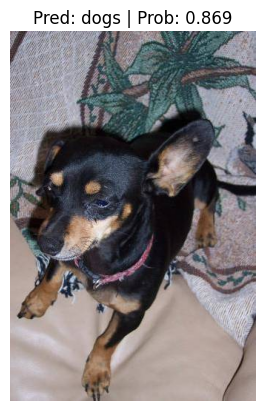

In [ ]:
custom_image_path = '/content/drive/MyDrive/Val_Dataset/dogs/dog.144.jpg'

pred_and_plot_image(model=pretrained_vit,
                    image_path=custom_image_path,
                    class_names=class_names)

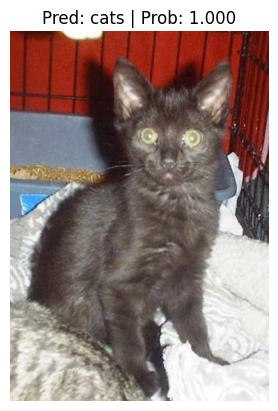

In [ ]:
custom_image_path = '/content/drive/MyDrive/Val_Dataset/cats/cat.180.jpg'


pred_and_plot_image(model=pretrained_vit,
                    image_path=custom_image_path,
                    class_names=class_names)